# Morris-Lecar Neuron Model

The Morris-Lecar (ML) model is a two-dimensional conductance-based neuron model that combines biophysical realism with mathematical tractability. Originally developed to describe the voltage oscillations in barnacle muscle fibers, it has become a popular intermediate-complexity model for studying neuronal dynamics. The ML model incorporates voltage-gated calcium channels for the depolarizing current and potassium channels for the repolarizing current, along with a leak current.

## Key Properties

1. **Class 1 or Class 2 Excitability**: Can be tuned to exhibit either type of excitability based on parameters
2. **Voltage Oscillations**: Can generate autonomous oscillations (like a pacemaker)
3. **Bistability**: Can display both stable rest state and stable limit cycle for certain parameter ranges
4. **Phase Plane Analysis**: Amenable to geometric analysis due to its two-dimensional nature
5. **Type I or Type II Bifurcations**: Can exhibit different transitions to spiking depending on parameters

## Mathematical Description

The model is described by two coupled differential equations:

C(dV/dt) = -gL(V - EL) - gCa·m∞(V)·(V - ECa) - gK·w·(V - EK) + Iext

dw/dt = φ·(w∞(V) - w)/τw(V)

Where:
m∞(V) = 0.5·(1 + tanh((V - V1)/V2))
w∞(V) = 0.5·(1 + tanh((V - V3)/V4))
τw(V) = 1/cosh((V - V3)/(2·V4))

Parameters:
- V: Membrane potential
- w: Potassium channel activation variable
- C: Membrane capacitance (typically 1-5 μF/cm²)
- gL: Leak conductance (typically 0.1-0.5 mS/cm²)
- gCa: Maximum calcium conductance (typically 1-4 mS/cm²)
- gK: Maximum potassium conductance (typically 2-8 mS/cm²)
- EL: Leak reversal potential (typically -50 to -70 mV)
- ECa: Calcium reversal potential (typically 100-140 mV)
- EK: Potassium reversal potential (typically -70 to -90 mV)
- V1: Calcium activation midpoint potential (typically -1 to 10 mV)
- V2: Calcium activation slope factor (typically 10-20 mV)
- V3: Potassium activation midpoint potential (typically -10 to 20 mV)
- V4: Potassium activation slope factor (typically 10-20 mV)
- φ: Temperature/timescale factor for potassium activation (typically 0.02-0.4)
- Iext: External current input

State Variables:
- V: Membrane potential (initialize near EL)
- w: Potassium channel activation (initialize at w∞(EL))

Time-related variables:
- dt: Time step for numerical integration
- t: Current simulation time
- tmax: Maximum simulation time

## Algorithm

1. Initialize state variables
   - V = initial value (typically near EL)
   - w = w∞(V) (initial potassium activation)
   - Create empty lists for storing V and w

2. For each time step from t=0 to t=tmax:
   
   a. Compute intermediate values
      - m∞(V) = 0.5·(1 + tanh((V - V1)/V2))
      - w∞(V) = 0.5·(1 + tanh((V - V3)/V4))
      - τw(V) = 1/cosh((V - V3)/(2·V4))
   
   b. Compute derivative terms
      - ICa = gCa·m∞(V)·(V - ECa)
      - IK = gK·w·(V - EK)
      - IL = gL·(V - EL)
      - dV/dt = (-IL - ICa - IK + Iext) / C
      - dw/dt = φ·(w∞(V) - w)/τw(V)
   
   c. Update state variables using numerical method (e.g., Euler, Runge-Kutta)
      - V = V + dV/dt * dt
      - w = w + dw/dt * dt
   
   d. Store variables for plotting
      - Record V, w at current time step
   
   e. Increment time: t = t + dt

3. Analyze and visualize results
   - Plot membrane potential (V) vs time
   - Plot potassium activation (w) vs time
   - Create phase plane plot (V vs w)
   - Analyze spike frequency and dynamics

## Characteristic Behaviors

1. **Excitability Types**: 
   - Type I: Firing frequency can be arbitrarily low near threshold (SNIC bifurcation)
   - Type II: Firing starts at non-zero frequency (Hopf bifurcation)

2. **Dynamical Regimes**:
   - Excitable: Single spikes in response to stimuli
   - Oscillatory: Autonomous periodic spiking
   - Bistable: Coexistence of stable rest state and limit cycle

3. **Response Properties**:
   - Post-inhibitory rebound
   - Frequency adaptation with certain parameter sets
   - Resonance properties

4. **Bifurcation Scenarios**:
   - Saddle-node bifurcation
   - Hopf bifurcation
   - Saddle-node on invariant circle (SNIC)

## Biological Mechanisms Represented

The model variables and currents represent:
- V: Membrane potential governed by ion channel dynamics
- w: Potassium channel activation (slow variable)
- Implicit m∞: Instantaneous calcium channel activation (fast variable)
- ICa: Voltage-dependent calcium current (depolarizing)
- IK: Voltage and time-dependent potassium current (repolarizing)
- IL: Leak current (stabilizing)

## Applications

The Morris-Lecar model is particularly useful for:
- Studying fundamental principles of neuronal excitability
- Analyzing bifurcations in neuronal dynamics
- Teaching computational neuroscience (due to its visualizable phase plane)
- Modeling neurons with calcium-dependent dynamics
- Studying oscillatory neural circuits
- Investigating the transition between different firing modes
- Understanding how parameter changes affect neuronal behavior

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class MorrisLecar():
    def __init__(self, C_m, g_Ca, g_K, g_L, E_Ca, E_K, E_L, 
                 V1, V2, V3, V4, phi, I_app, time_steps, V_init=None):
        # Membrane parameters
        self.C_m = C_m        # Membrane capacitance (μF/cm²)
        
        # Conductances (mS/cm²)
        self.g_Ca = g_Ca      # Maximum conductance for Ca2+ channels
        self.g_K = g_K        # Maximum conductance for K+ channels
        self.g_L = g_L        # Leak conductance
        
        # Reversal potentials (mV)
        self.E_Ca = E_Ca      # Calcium reversal potential
        self.E_K = E_K        # Potassium reversal potential
        self.E_L = E_L        # Leak reversal potential
        
        # Parameters for steady-state activation functions
        self.V1 = V1          # Half-activation for m_inf
        self.V2 = V2          # Slope factor for m_inf
        self.V3 = V3          # Half-activation for w_inf
        self.V4 = V4          # Slope factor for w_inf
        
        # Time scale parameter for K+ channel
        self.phi = phi        # Dimensionless
        
        # Input current (μA/cm²)
        self.I_app = I_app
        
        # Simulation time steps
        self.time_steps = time_steps
        
        # Initial conditions
        self.V_init = -60.0 if V_init is None else V_init  # Initial membrane potential
    
    def m_inf(self, V):
        """Steady-state activation for Ca2+ channels"""
        return 0.5 * (1 + np.tanh((V - self.V1) / self.V2))
    
    def w_inf(self, V):
        """Steady-state activation for K+ channels"""
        return 0.5 * (1 + np.tanh((V - self.V3) / self.V4))
    
    def tau_w(self, V):
        """Time constant for K+ channel activation"""
        return 1.0 / (np.cosh((V - self.V3) / (2.0 * self.V4)))
    
    def simulate(self):
        """Run Morris-Lecar model simulation"""
        # Initialize arrays for storing voltage and w (K+ channel activation)
        n_steps = len(self.time_steps)
        V = np.zeros(n_steps)
        w = np.zeros(n_steps)
        
        # Set initial conditions
        V[0] = self.V_init
        w[0] = self.w_inf(self.V_init)  # Start w at steady state for initial V
        
        # Time step size
        dt = self.time_steps[1] - self.time_steps[0]
        
        # Numerical integration using Euler method
        for i in range(n_steps - 1):
            # Current values
            V_current = V[i]
            w_current = w[i]
            
            # Calculate ionic currents
            I_Ca = self.g_Ca * self.m_inf(V_current) * (V_current - self.E_Ca)
            I_K = self.g_K * w_current * (V_current - self.E_K)
            I_L = self.g_L * (V_current - self.E_L)
            
            # Calculate derivatives
            dVdt = (self.I_app - I_Ca - I_K - I_L) / self.C_m
            dwdt = self.phi * (self.w_inf(V_current) - w_current) / self.tau_w(V_current)
            
            # Update using Euler method
            V[i+1] = V_current + dt * dVdt
            w[i+1] = w_current + dt * dwdt
        
        return V, w
    
    def plot_results(self, V, w):
        """Plot membrane potential and potassium channel activation"""
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
        
        # Plot membrane potential
        ax1.plot(self.time_steps, V, 'b-', label='Membrane Potential')
        ax1.set_ylabel('Voltage (mV)')
        ax1.set_title('Morris-Lecar Neuron Model')
        ax1.grid(True)
        ax1.legend()
        
        # Plot K+ channel activation
        ax2.plot(self.time_steps, w, 'g-', label='K+ Activation (w)')
        ax2.set_xlabel('Time (ms)')
        ax2.set_ylabel('w')
        ax2.grid(True)
        ax2.legend()
        
        plt.tight_layout()
        plt.show()
        
    def plot_phase_plane(self, V, w):
        """Plot phase plane with V-nullcline and w-nullcline"""
        fig, ax = plt.subplots(figsize=(8, 8))
        
        # Plot trajectory in phase plane
        ax.plot(V, w, 'k-', label='Trajectory')
        ax.plot(V[0], w[0], 'ro', label='Initial Condition')
        
        # Generate points for nullclines
        V_range = np.linspace(min(V)-10, max(V)+10, 1000)
        
        # V-nullcline: points where dV/dt = 0
        # This requires solving: I_app - g_Ca*m_inf(V)*(V-E_Ca) - g_K*w*(V-E_K) - g_L*(V-E_L) = 0
        # For w, this gives: w = (I_app - g_Ca*m_inf(V)*(V-E_Ca) - g_L*(V-E_L))/(g_K*(V-E_K))
        w_V_nullcline = []
        for v in V_range:
            if abs(v - self.E_K) < 1e-6:  # Avoid division by zero
                continue
            I_Ca = self.g_Ca * self.m_inf(v) * (v - self.E_Ca)
            I_L = self.g_L * (v - self.E_L)
            w_null = (self.I_app - I_Ca - I_L) / (self.g_K * (v - self.E_K))
            if 0 <= w_null <= 1:  # Only include physiologically meaningful values
                w_V_nullcline.append((v, w_null))
        
        if w_V_nullcline:  # Check if the list is not empty
            V_null_x, V_null_y = zip(*w_V_nullcline)
            ax.plot(V_null_x, V_null_y, 'b-', label='V-nullcline')
        
        # w-nullcline: points where dw/dt = 0, which is simply w = w_inf(V)
        w_W_nullcline = [self.w_inf(v) for v in V_range]
        ax.plot(V_range, w_W_nullcline, 'g-', label='w-nullcline')
        
        ax.set_xlabel('Membrane Potential (mV)')
        ax.set_ylabel('K+ Activation (w)')
        ax.set_title('Phase Plane Analysis')
        ax.legend()
        ax.grid(True)
        plt.tight_layout()
        plt.show()

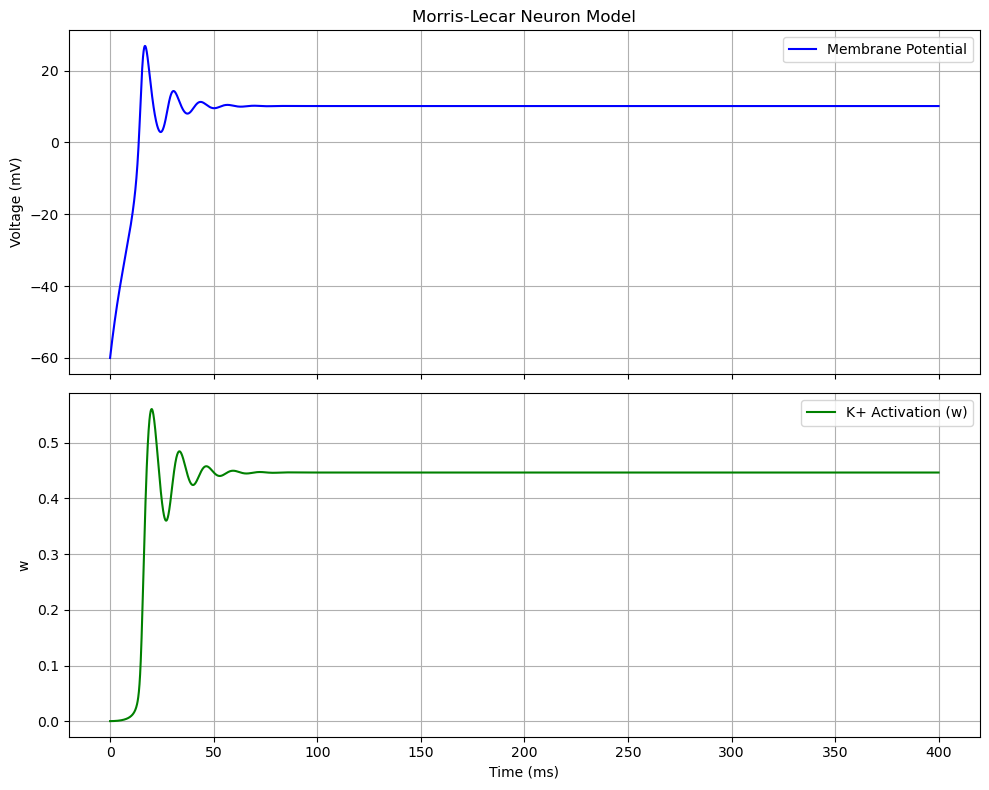

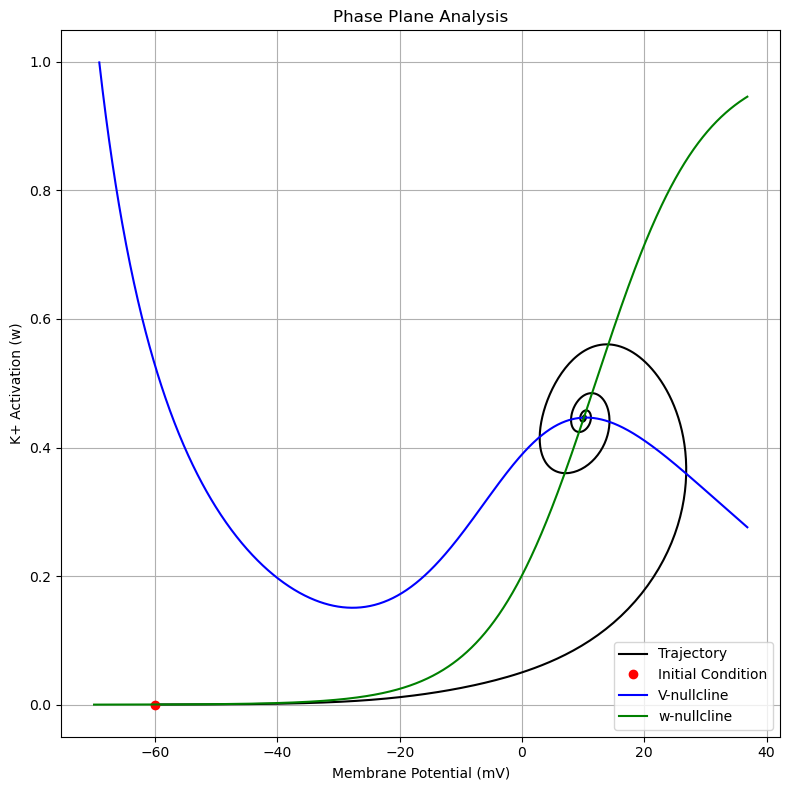

In [3]:
# Create a Morris-Lecar neuron
t_max = 400  # ms
dt = 0.1  # ms
time_steps = np.arange(0, t_max, dt)

# Morris-Lecar parameters (updated for better action potential generation)
ml_neuron = MorrisLecar(
    C_m=20.0,       # μF/cm²
    g_Ca=4.4,       # mS/cm² (increased from 4.0)
    g_K=8.0,        # mS/cm²
    g_L=2.0,        # mS/cm²
    E_Ca=120.0,     # mV
    E_K=-84.0,      # mV
    E_L=-60.0,      # mV
    V1=-1.2,        # mV
    V2=18.0,        # mV
    V3=12.0,        # mV (changed from 2.0 for better excitability)
    V4=17.4,        # mV (reduced from 30.0 for sharper K+ activation)
    phi=0.23,       # dimensionless (increased from 0.04 for faster K+ dynamics)
    I_app=100.0,    # μA/cm² (increased from 60.0 to trigger action potentials)
    time_steps=time_steps,
    V_init=-60.0    # mV
)

# Run simulation
V, w = ml_neuron.simulate()

# Plot results
ml_neuron.plot_results(V, w)

# Plot phase plane
ml_neuron.plot_phase_plane(V, w)